## CME538 GROUP PROJECT
TTC SUBWAY, TTC BUS EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS


### Set up Notebook

In [5]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [6]:
# Import subway and bus data

ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")

C:\Users\diana\AppData\Local\Temp\ipykernel_13248\2253931521.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ttc_bus_df = pd.read_csv("ttc_bus_df.csv")


## TTC SUBWAY

In [128]:
#TTC Subway dataframe basic info
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       102486 non-null  object
 1   Time       102486 non-null  object
 2   Day        102486 non-null  object
 3   Station    102486 non-null  object
 4   Code       102486 non-null  object
 5   Min Delay  102486 non-null  int64 
 6   Min Gap    102486 non-null  int64 
 7   Bound      73761 non-null   object
 8   Line       102157 non-null  object
 9   Vehicle    102486 non-null  int64 
 10  year       102486 non-null  int32 
 11  month      102486 non-null  int32 
 12  month_day  102486 non-null  int32 
 13  hour       102486 non-null  int32 
dtypes: int32(4), int64(3), object(7)
memory usage: 10.2+ MB


### Outliers

In [57]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]


In [58]:
#Check ttc subway basic statistical data
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,102486.000000,102486.000000,102486.000000,102486.00000
mean,54011.082167,1.729475,3.081777,3530.84354
std,31069.249287,2.529287,4.378530,2654.52430
min,0.000000,0.000000,0.000000,0.00000
25%,27281.250000,0.000000,0.000000,0.00000
50%,53817.500000,0.000000,0.000000,5167.00000
75%,80963.750000,3.000000,7.000000,5646.00000
max,108003.000000,10.000000,27.000000,69021.00000


C:\Users\diana\AppData\Local\Temp\ipykernel_17884\2260149558.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


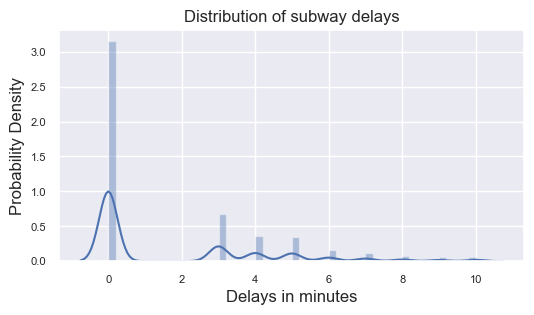

In [38]:
# Plot Min Delay probability density plot
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

### Time-based indexing

In [59]:
#Merge Date and Time Columns
ttc_subway_df['Datetime'] = pd.to_datetime(ttc_subway_df['Date']+' '+ ttc_subway_df['Time'])

#Drop Unnamed column
ttc_subway_df = ttc_subway_df.drop(['Unnamed: 0'], axis=1)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Datetime
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022-01-01 15:59:00
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022-01-01 02:23:00
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022-01-01 22:00:00
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022-01-01 02:28:00
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022-01-01 02:34:00


In [60]:
# Set the Date column as the index
ttc_subway_df.set_index('Datetime', inplace = True)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Datetime,,,,,,,,,,
2022-01-01 15:59:00,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01 02:23:00,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01 22:00:00,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01 02:28:00,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01 02:34:00,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [61]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df['hour'] = ttc_subway_df.index.hour
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 15:59:00 to 2021-12-31 07:00:00
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       102486 non-null  object
 1   Time       102486 non-null  object
 2   Day        102486 non-null  object
 3   Station    102486 non-null  object
 4   Code       102486 non-null  object
 5   Min Delay  102486 non-null  int64 
 6   Min Gap    102486 non-null  int64 
 7   Bound      73761 non-null   object
 8   Line       102157 non-null  object
 9   Vehicle    102486 non-null  int64 
 10  year       102486 non-null  int32 
 11  month      102486 non-null  int32 
 12  month_day  102486 non-null  int32 
 13  hour       102486 non-null  int32 
dtypes: int32(4), int64(3), object(7)
memory usage: 10.2+ MB


### Seasonal changes analysis

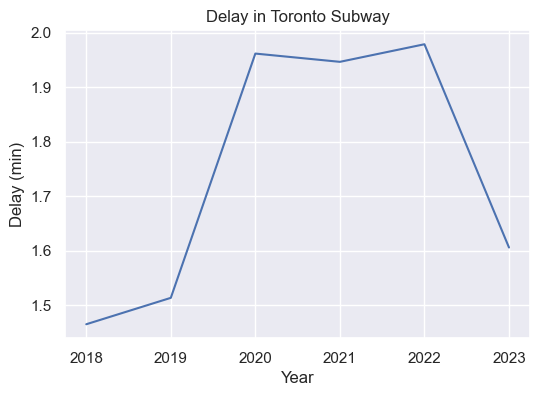

In [16]:
#Plot TTC Subway average delay per year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")
plt.show()



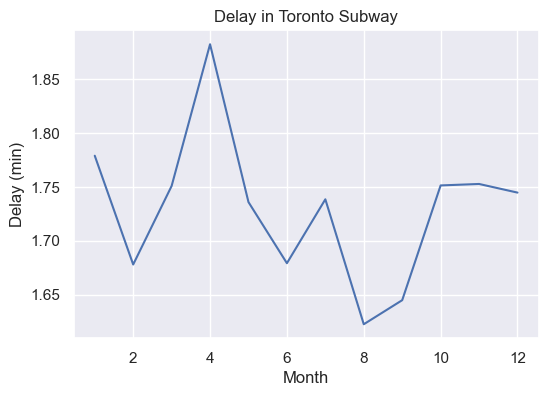

In [17]:
#Plot TTC Subway average delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

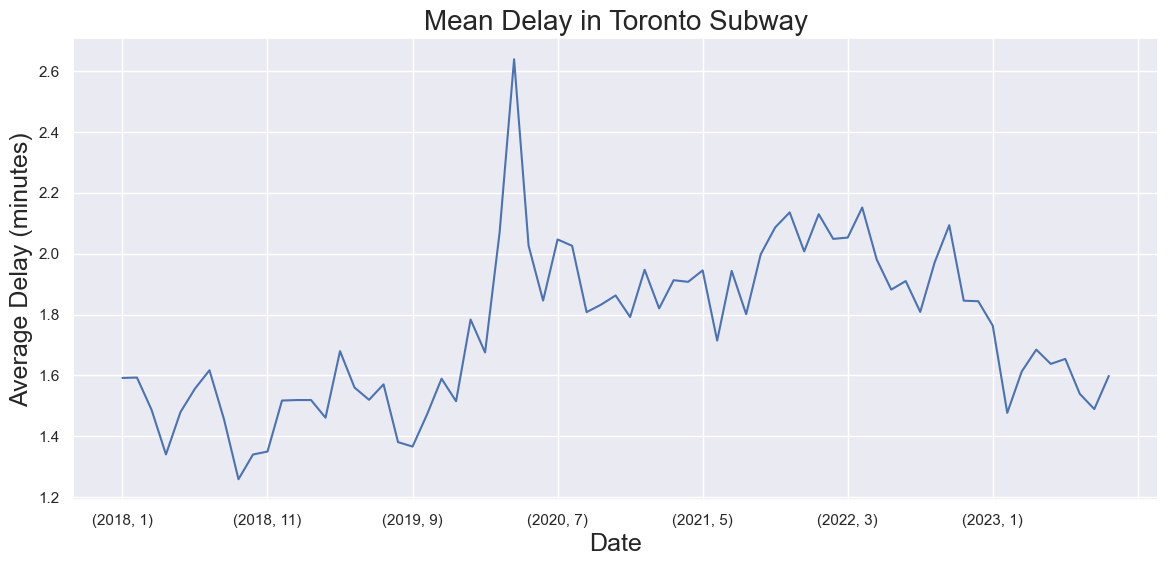

In [18]:
#Average TTC Subway by month and year
plt.figure(figsize=(14, 6))
ax = ttc_subway_df.groupby(["year", "month"])["Min Delay"].mean().plot()
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
ax.set_title('Mean Delay in Toronto Subway', fontsize=20)

plt.show()

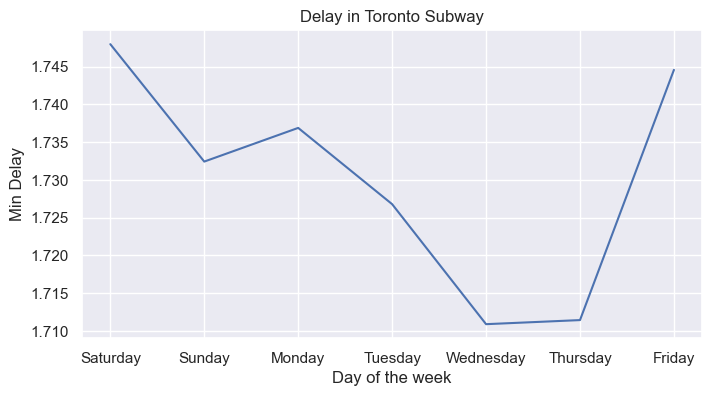

In [19]:
#Plot TTC Subway delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

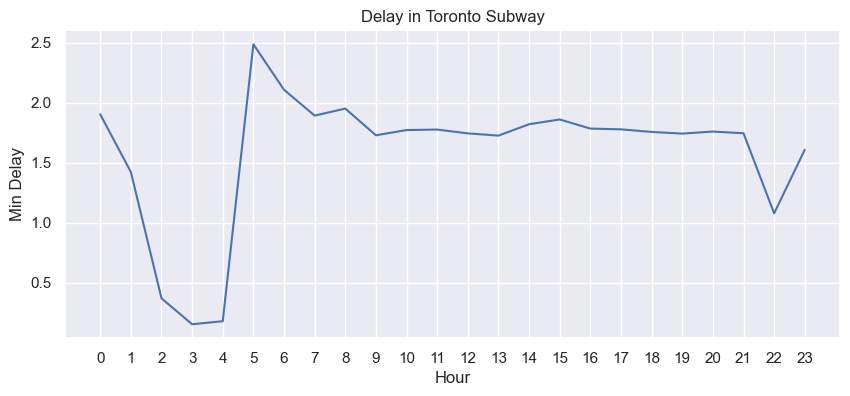

In [20]:
#Plot TTC Subway delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['hour'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Hour', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.xticks(range(0, 24, 1))

plt.show()

### Peak and off-peak hours
According to the TTC peak hours are 6-9a.m and 3-7p.m

In [21]:
#Define function to determine if a given datime is in peak hour

def is_peak_hour(dt):
    hour = dt.hour
    return 1 if ((6 <= hour <= 9) or (15 <= hour <= 19)) else 0

#Apply function to create a new column 'peakhour'
ttc_subway_df['peakhour'] = ttc_subway_df.index.to_series().apply(is_peak_hour)
ttc_subway_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour
Datetime,,,,,,,,,,,,,,,
2022-01-01 15:59:00,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1,15,1
2022-01-01 02:23:00,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1,2,0
2022-01-01 22:00:00,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1,22,0
2022-01-01 02:28:00,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1,2,0
2022-01-01 02:34:00,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1,2,0


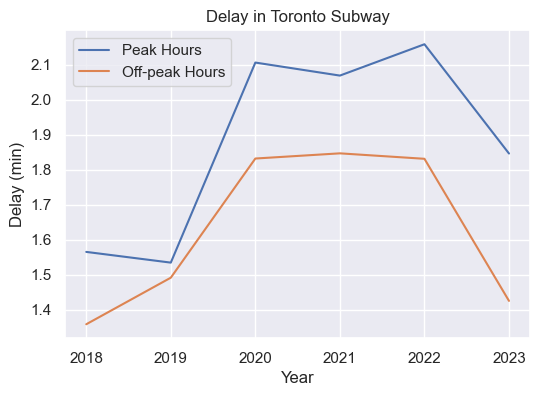

In [22]:
#Plot TTC subway delay by year with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['year'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

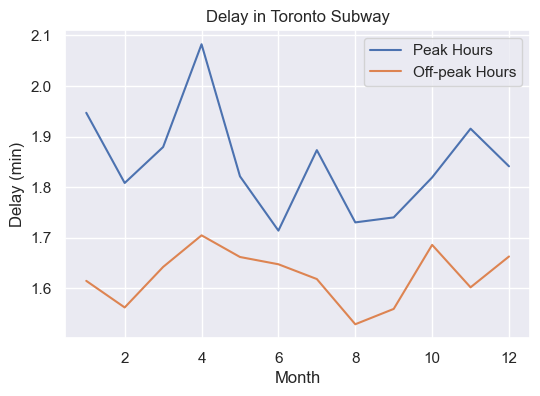

In [23]:
#Plot Toronto subway Delay by month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours')
# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

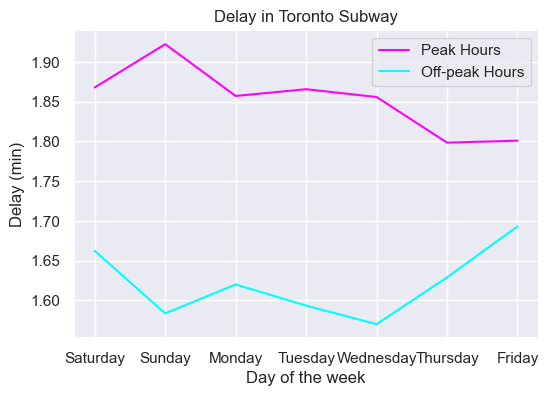

In [24]:
#Plot Toronto subway delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

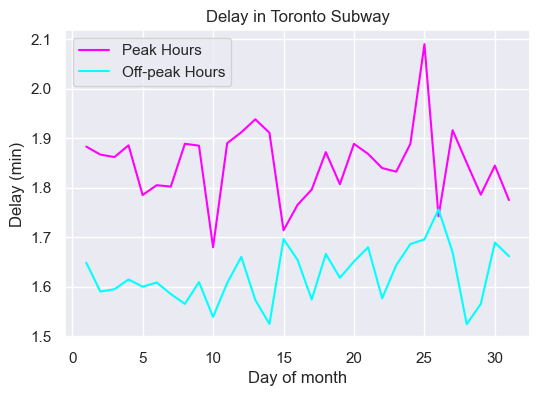

In [25]:
#Plot Toronto subway delay by day of the month with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['month_day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

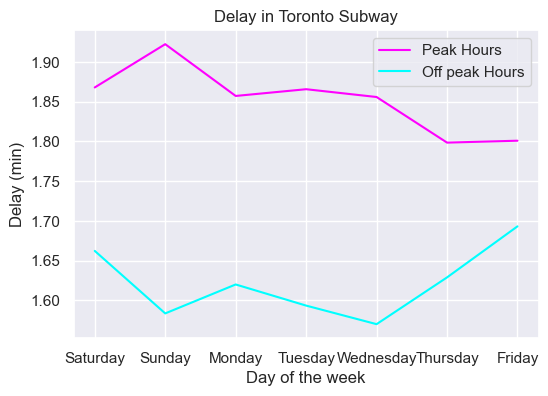

In [26]:
#Plot Toronto subway delay by day of the week with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Day'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

### Seasons

In [27]:
#Add seasons column
def get_season(month):
    if 3 <= month <=5:
        return 'Spring'
    elif 6<=month <=8:
        return 'Summer'
    elif 9<=month <=11:
        return 'Fall'
    else: 
        return 'Winter'

#Apply the function
ttc_subway_df['season'] = ttc_subway_df['month'].apply(get_season)

ttc_subway_df.tail()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,,
2021-12-31 01:10:00,2021-12-31,01:10,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31,1,0,Winter
2021-12-31 01:12:00,2021-12-31,01:12,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31,1,0,Winter
2021-12-31 01:21:00,2021-12-31,01:21,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31,1,0,Winter
2021-12-31 01:37:00,2021-12-31,01:37,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31,1,0,Winter
2021-12-31 07:00:00,2021-12-31,07:00,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31,7,1,Winter


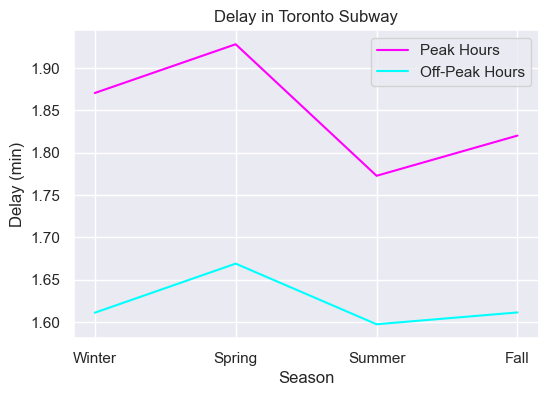

In [28]:
#Plot Toronto subway Delay by season with peak hours

sns.set()  
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==1]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==1]['Min Delay'],errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_subway_df[ttc_subway_df['peakhour'] ==0]['season'], y= ttc_subway_df[ttc_subway_df['peakhour'] ==0]['Min Delay'],errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

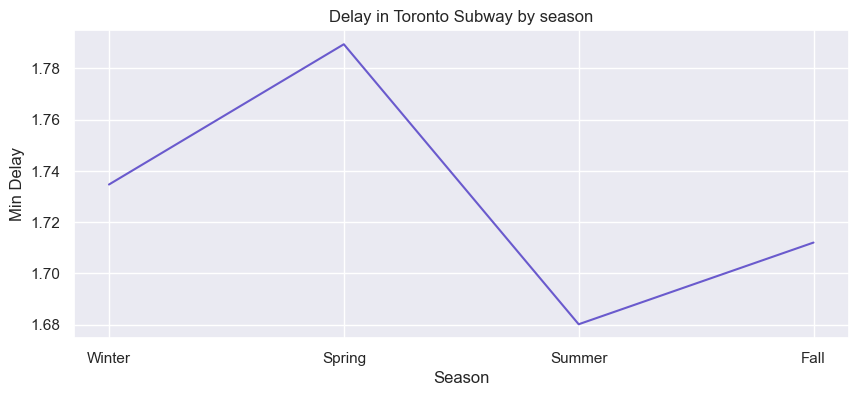

In [29]:
#Plot Toronto subway Delay by hour of the day
sns.set()  
plt.figure(figsize=(10,4))
sns.lineplot(x=ttc_subway_df['season'], y=ttc_subway_df['Min Delay'],errorbar=None, color='#6A5ACD')

# Set labels 
plt.xlabel('Season', fontsize=12)
plt.title("Delay in Toronto Subway by season")

plt.show()

### Unique Values

In [30]:
#Check unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



Number of unique Stations: 826
Number of unique codes: 206
Number of unique bound: 7
Number of unique lines: 55
Number of unique vehicles: 1068


### Stations

In [42]:
#Make a list of the unique "Station' values
unique_stations =  ttc_subway_df['Station'].unique()
print(unique_stations)
unique_stations_list = unique_stations.tolist()

['LAWRENCE EAST STATION' 'SPADINA BD STATION' 'KENNEDY SRT STATION TO'
 'VAUGHAN MC STATION' 'EGLINTON STATION' 'QUEEN STATION'
 'DAVISVILLE STATION' 'ST PATRICK STATION' 'PAPE STATION' 'WILSON STATION'
 'KENNEDY BD STATION' 'FINCH STATION' 'YONGE BD STATION'
 'ST ANDREW STATION' 'MAIN STREET STATION' 'HIGH PARK STATION'
 'GREENWOOD STATION' 'COXWELL STATION' 'WELLESLEY STATION'
 'SHEPPARD WEST STATION' 'BLOOR STATION' 'UNION STATION'
 'ST GEORGE YUS STATION' 'ROSEDALE STATION' 'ISLINGTON STATION'
 'HIGHWAY 407 STATION' 'KIPLING STATION' 'YONGE/UNIVERSITY AND B'
 'ST GEORGE BD STATION' 'CHRISTIE STATION' 'BESSARION STATION'
 'MCCOWAN STATION' 'ST CLAIR WEST STATION' 'YORKDALE STATION'
 'WARDEN STATION' 'COLLEGE STATION' 'RUNNYMEDE STATION' 'DUPONT STATION'
 'KEELE STATION' 'LAWRENCE WEST STATION' 'LANSDOWNE STATION'
 'NORTH YORK CTR STATION' 'DUNDAS STATION' 'DUNDAS WEST STATION'
 'ROYAL YORK STATION' 'FINCH WEST STATION' 'SHERBOURNE STATION'
 'KENNEDY SRT STATION' 'ELLESMERE STATION' 

C:\Users\diana\AppData\Local\Temp\ipykernel_17884\706166567.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


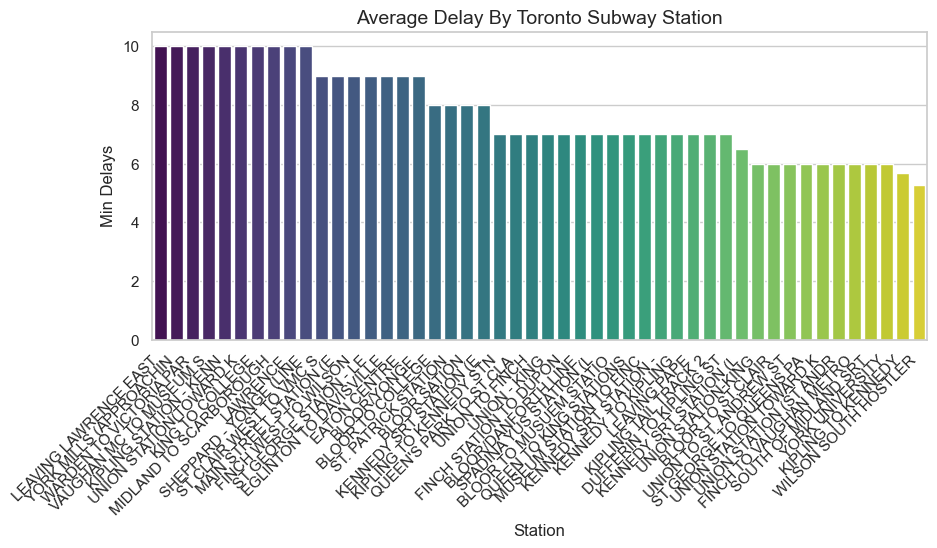

In [44]:
# Barplot TTC Subway Min Delay and Stations  
ttc_subway_agg_station = ttc_subway_df.groupby('Station')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station = ttc_subway_agg_station[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Station', y='Min Delay', data=ttc_subway_agg_sorted_station, palette='viridis', hue = 'Station', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Station', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Station', fontsize=14)

# Show the plot
plt.show()

### Most Delay Station

In [62]:
#SUM OF DELAYS
ttc_subway_agg_station_sum = ttc_subway_df.groupby('Station')['Min Delay'].sum().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station_sum = ttc_subway_agg_station_sum[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)
ttc_subway_agg_sorted_station_sum 

,Station,Min Delay
662,VAUGHAN MC STATION,9218
168,FINCH STATION,7691
253,KENNEDY BD STATION,6854
141,EGLINTON STATION,6726
700,WILSON STATION,5766
...,...,...
373,LINE 3 - SCARBOROUGH R,0
370,LINE 3,0
359,LINE 1 YONGE UNIVERSIT,0
342,LAWRENCE TO ST CLAIR S,0


In [63]:
#COUNT OF DELAYS PER STATION
ttc_subway_agg_station_count = ttc_subway_df.groupby('Station')['Min Delay'].count().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_station_count= ttc_subway_agg_station_count[ttc_subway_agg_station['Min Delay'] > 5].sort_values(by='Min Delay', ascending=False)
ttc_subway_agg_sorted_station_count

,Station,Min Delay
168,FINCH STATION,4720
253,KENNEDY BD STATION,3946
305,KIPLING STATION,3614
662,VAUGHAN MC STATION,3442
33,BLOOR STATION,3031
...,...,...
430,OSSINGTON CENTRE TRACK,6
359,LINE 1 YONGE UNIVERSIT,6
370,LINE 3,6
499,SHEPPARD WEST TO ST CL,6


### Codes

In [65]:
#Make a list of the unique "Code' values
unique_codes =  ttc_subway_df['Code'].unique()
unique_codes_list = unique_codes.tolist()
print('list of codes:',unique_codes_list)

#Make a list of the unique "Bound' values
unique_bound =  ttc_subway_df['Bound'].unique()
unique_bound_list = unique_bound.tolist()
print('List of bound:',unique_bound_list)

#Make a list of the unique "Lines' values
unique_lines =  ttc_subway_df['Line'].unique()
unique_lines_list = unique_lines.tolist()
print('List of lines:',unique_lines_list)

list of codes: ['SRDP', 'MUIS', 'MRO', 'MUATC', 'MUNCA', 'TUATC', 'MUSC', 'TUNOA', 'TUO', 'SUO', 'PUOPO', 'MUIRS', 'MUIE', 'SUDP', 'SUUT', 'MUSAN', 'MUD', 'MUPR1', 'MUO', 'EUPI', 'TUMVS', 'MUI', 'TRNOA', 'SUAE', 'TRO', 'PUSSW', 'EUDO', 'PUMEL', 'SUAP', 'TUSC', 'PUMST', 'PUSAC', 'MUPAA', 'SUSA', 'PUSTS', 'PUSIS', 'ERDO', 'MRTO', 'EUYRD', 'EUSC', 'MUTO', 'TUNIP', 'TUOS', 'PUSO', 'ERCD', 'ERTC', 'TUCC', 'MUCL', 'SRSA', 'MUIR', 'EUNT', 'MRPAA', 'SUG', 'SUEAS', 'TUSUP', 'EUOE', 'MRNOA', 'PUMO', 'EUO', 'MUNOA', 'PUTD', 'MUPLC', 'PUSTC', 'ERRA', 'PRO', 'SUPOL', 'PUTO', 'SUROB', 'MRDD', 'EUCD', 'MUDD', 'TUS', 'MUTD', 'TRST', 'TUST', 'EUAC', 'MRUI', 'TUOPO', 'TUML', 'MRWEA', 'MRPLA', 'MUWEA', 'MUFM', 'PUTOE', 'PUTIS', 'PUEO', 'EUBK', 'EUTR', 'PUSRA', 'EUCA', 'MRIE', 'PUSI', 'PUSNT', 'PRSO', 'PUTR', 'ERLV', 'EUAL', 'PUTIJ', 'PRSL', 'TRTC', 'PUTWZ', 'EUBO', 'PUSZC', 'MUWR', 'MRCL', 'PUCSS', 'EUME', 'EUATC', 'MRSAN', 'PREL', 'ERBO', 'SRO', 'TUSET', 'SRUT', 'ERHV', 'ERO', 'MRPLB', 'TRNCA', 'PUTDN',

C:\Users\diana\AppData\Local\Temp\ipykernel_17884\2170951018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


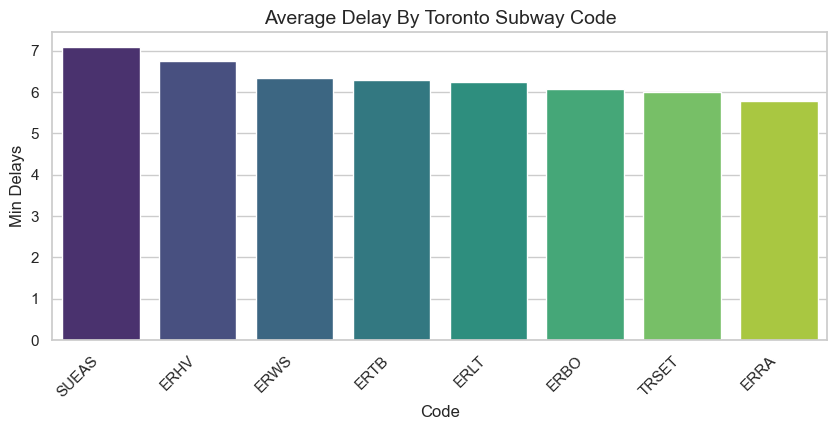

In [67]:
# Barplot of Min Delay and Code for TTC Subway
ttc_subway_agg_code = ttc_subway_df.groupby('Code')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_subway_agg_sorted_code = ttc_subway_agg_code[ttc_subway_agg_code['Min Delay'] > 5.7].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Code', y='Min Delay', data=ttc_subway_agg_sorted_code, palette='viridis', hue = 'Code', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Code', fontsize=12)
plt.ylabel('Min Delays', fontsize=12)
plt.title('Average Delay By Toronto Subway Code', fontsize=14)

# Show the plot
plt.show()

### Subway Correlation Analysis

In [72]:
#Create dataframe with only numeric columns
non_numeric_columns = ttc_subway_df.select_dtypes(exclude ='number').columns
ttc_subway_df_numeric = ttc_subway_df.drop(columns= non_numeric_columns)
ttc_subway_df_numeric.head()

,Min Delay,Min Gap,Vehicle,year,month,month_day,hour
Datetime,,,,,,,
2022-01-01 15:59:00,0,0,3023,2022,1,1,15
2022-01-01 02:23:00,0,0,0,2022,1,1,2
2022-01-01 22:00:00,0,0,0,2022,1,1,22
2022-01-01 02:28:00,0,0,0,2022,1,1,2
2022-01-01 02:34:00,0,0,5981,2022,1,1,2


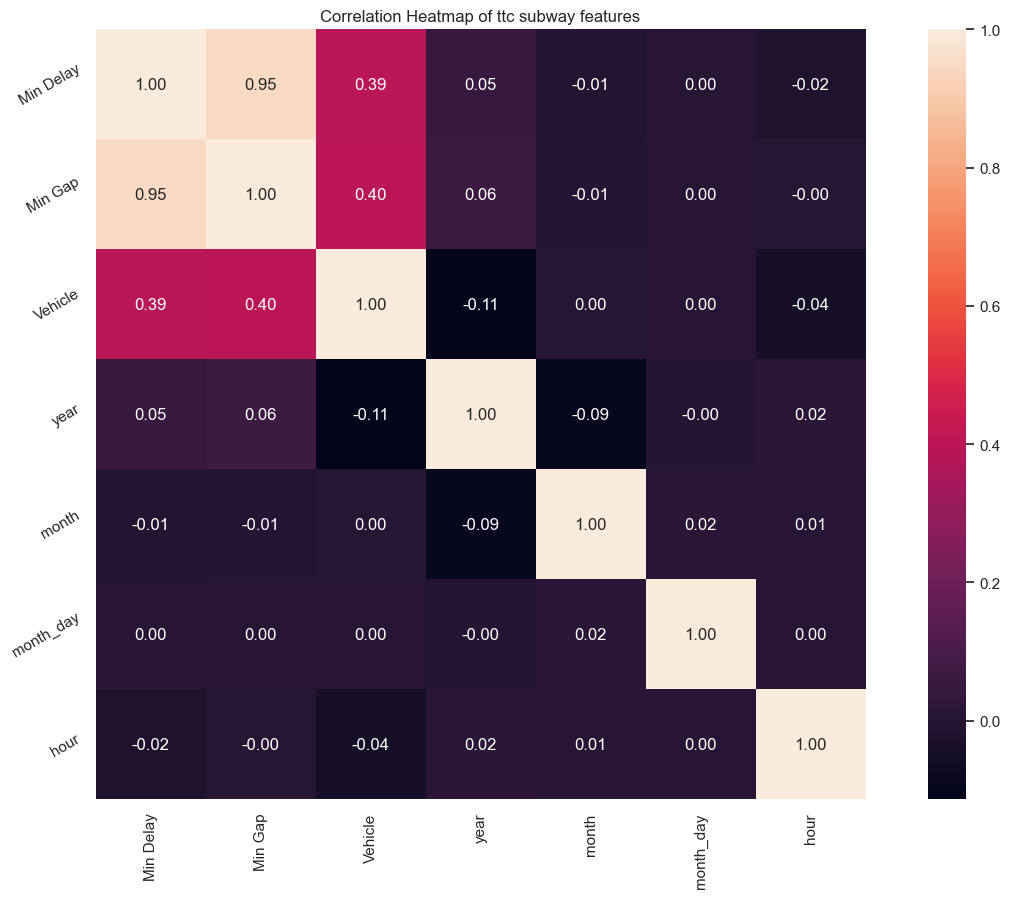

In [73]:
#Correlate ttc subway features
correlation  = ttc_subway_df_numeric.corr()
plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap of ttc subway features')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()


C:\Users\diana\PycharmProjects\CME538_2023\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\diana\PycharmProjects\CME538_2023\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\diana\PycharmProjects\CME538_2023\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\diana\PycharmProjects\CME538_2023\venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\diana\PycharmProjects\CME538_2023\venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


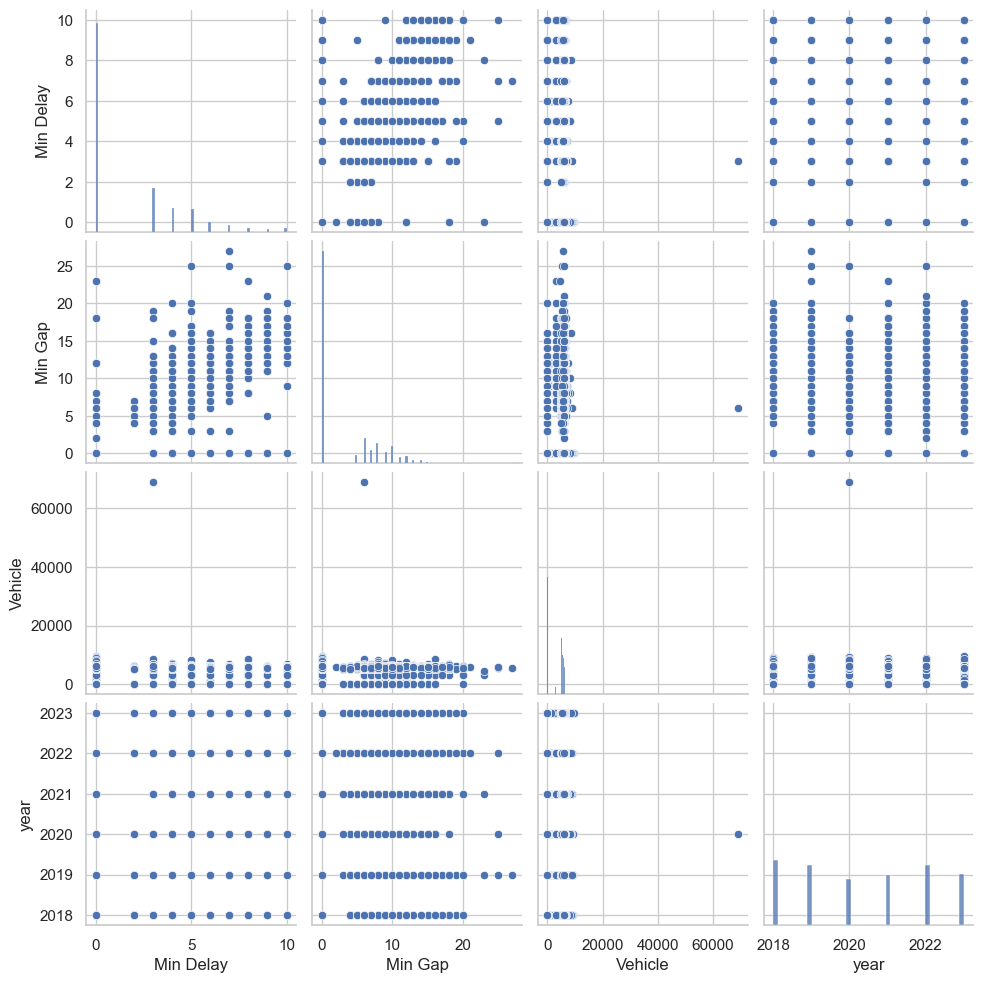

In [75]:
#PLot correlations 
num_var = ['Min Delay','Min Gap','Vehicle','year']
sns.pairplot(ttc_subway_df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

### Reliability


I calculated the total # of trips per day, then found the number of delayed trips per day and divided them (and then took reliability to be 1 - that percentage of delayed trips)

In [ ]:
#Of Trips per day
#delayed trips per day
#reliability 1- percentage of trips delay

#Calculate number of trips per day

ttc_subway_df

In [ ]:
ttc_subway_df

In [ ]:
ttcsubway_delay_perday = ttc_subway_df.groupby(["Date", "Day", "Line"]).count().reset_index()
ttcsubway_delay_perday.head()

## TTC BUS 

In [42]:
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


In [43]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,313460.000000,307525.000000,312570.000000,286529.000000
mean,156729.500000,22.329710,33.748024,5528.746696
std,90488.252028,73.698228,74.520075,3763.471128
min,0.000000,-54.000000,0.000000,0.000000
25%,78364.750000,8.000000,16.000000,1648.000000
50%,156729.500000,10.000000,20.000000,7950.000000
75%,235094.250000,18.000000,34.000000,8583.000000
max,313459.000000,2030.000000,1890.000000,99035.000000


### Outliers

In [76]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1_bus= ttc_bus_df['Min Delay'].quantile(0.25)
Q3_bus= ttc_bus_df['Min Delay'].quantile(0.75)
IQR_bus =Q3_bus-Q1_bus

#Define the bounds for outlier removal
lower_bound_bus= Q1_bus-1.5*IQR
upper_bound_bus= Q3_bus +2*IQR

#Remove outliers by creating a mask
mask= (ttc_bus_df['Min Delay']<= upper_bound_bus)
ttc_bus_df = ttc_bus_df[mask]

# View DataFrame
ttc_bus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273312 entries, 0 to 313459
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   273312 non-null  int64  
 1   Report Date  273312 non-null  object 
 2   Route        272245 non-null  object 
 3   Time         273312 non-null  object 
 4   Day          273312 non-null  object 
 5   Location     273041 non-null  object 
 6   Incident     272409 non-null  object 
 7   Min Delay    273312 non-null  float64
 8   Min Gap      272846 non-null  float64
 9   Direction    245261 non-null  object 
 10  Vehicle      253212 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.0+ MB


In [77]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,273312.000000,273312.000000,272846.000000,253212.000000
mean,158422.872786,11.105755,21.738893,5555.980167
std,89284.517236,6.099669,15.559736,3762.173094
min,0.000000,-54.000000,0.000000,0.000000
25%,81791.750000,8.000000,14.000000,1658.000000
50%,157802.500000,10.000000,20.000000,7959.000000
75%,235745.250000,15.000000,30.000000,8602.000000
max,313459.000000,26.000000,999.000000,99035.000000


In [78]:
#Merge Date and Time Columns
ttc_bus_df['Datetime'] = pd.to_datetime(ttc_bus_df['Report Date'])
ttc_bus_df.head()

C:\Users\diana\AppData\Local\Temp\ipykernel_17884\37664598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['Datetime'] = pd.to_datetime(ttc_bus_df['Report Date'])


,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Datetime
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0,2018-01-01
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0,2018-01-01
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0,2018-01-01
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0,2018-01-01
5,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0,2018-01-01


In [79]:
# Set the datetime colum as the index
ttc_bus_df.set_index('Datetime', inplace = True)
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
Datetime,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0
2018-01-01,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0


In [80]:
# Add new columns 'year', 'month' and 'month_day' that indicate the year, month and day associated with each observation

ttc_bus_df['year'] = ttc_bus_df.index.year
ttc_bus_df['month'] = ttc_bus_df.index.month
ttc_bus_df['month_day'] = ttc_bus_df.index.day
ttc_bus_df['hour'] = ttc_bus_df.index.hour

C:\Users\diana\AppData\Local\Temp\ipykernel_17884\1476808294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['year'] = ttc_bus_df.index.year
C:\Users\diana\AppData\Local\Temp\ipykernel_17884\1476808294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['month'] = ttc_bus_df.index.month
C:\Users\diana\AppData\Local\Temp\ipykernel_17884\1476808294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

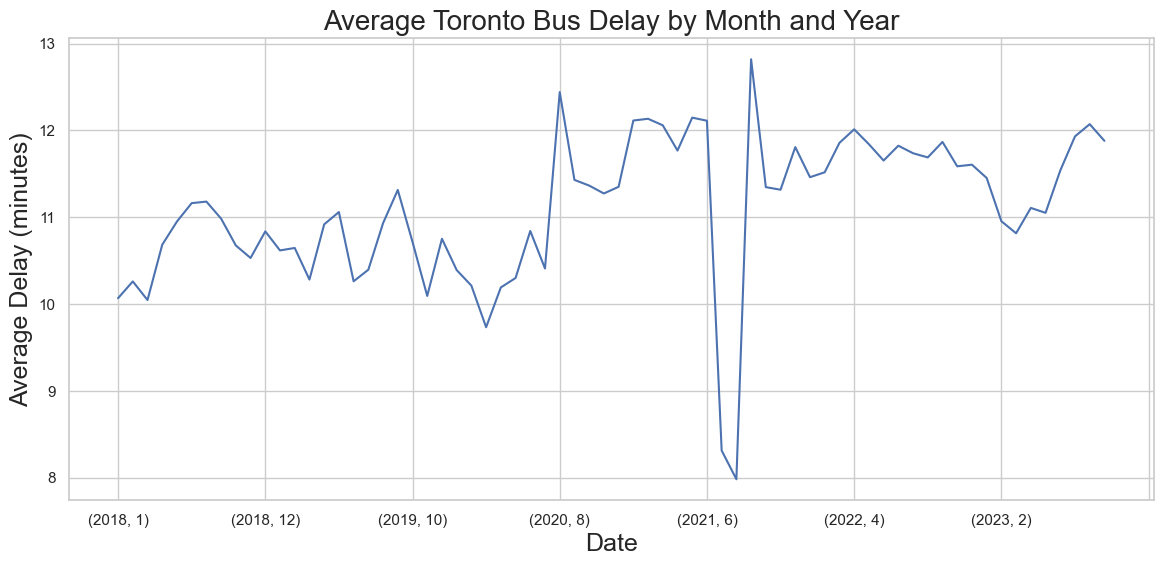

In [81]:
#TTC BUS Average Delay by month and year
plt.figure(figsize=(14, 6))
ax = ttc_bus_df.groupby(["year", "month"])["Min Delay"].mean().plot()

# Set the background color to white
ax.figure.set_facecolor('white')
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
ax.set_title('Average Toronto Bus Delay by Month and Year', fontsize=20)

plt.show()


### Peak hours

In [84]:
#Add peak hours column
#Apply function to create a new column 'peakhour'
ttc_bus_df['peakhour'] = ttc_bus_df.index.to_series().apply(is_peak_hour)

ttc_bus_df.head()

C:\Users\diana\AppData\Local\Temp\ipykernel_17884\2947969059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['peakhour'] = ttc_bus_df.index.to_series().apply(is_peak_hour)


,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,year,month,month_day,hour,peakhour
Datetime,,,,,,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0,2018,1,1,0,0
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0,2018,1,1,0,0
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0,2018,1,1,0,0
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0,2018,1,1,0,0
2018-01-01,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0,2018,1,1,0,0


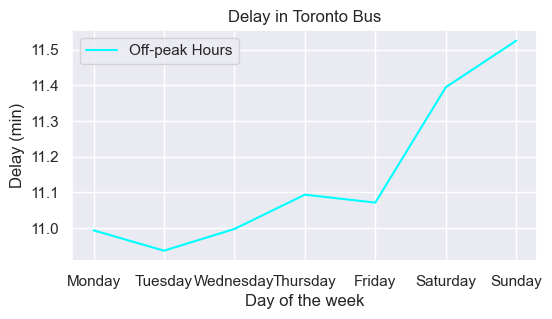

In [85]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Day'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()

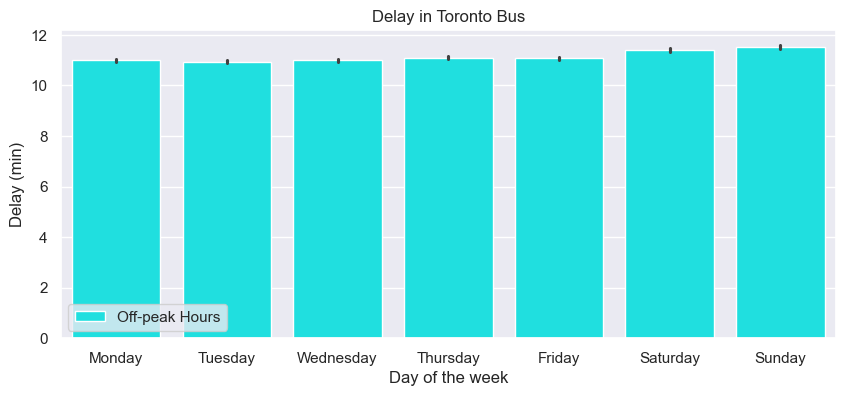

In [86]:
# Plot Toronto bus Delay by day of the week with peak hours
sns.set()  # Resets styles to default
plt.figure(figsize=(10, 4))

# Filter data for peak and off-peak hours
peak_hours_data = ttc_bus_df[ttc_bus_df['peakhour'] == 1]
off_peak_hours_data = ttc_bus_df[ttc_bus_df['peakhour'] == 0]

# Barplot for Peak Hours
sns.barplot(x=peak_hours_data['Day'], y=peak_hours_data['Min Delay'], color='#FF00FF', label='Peak Hours')

# Barplot for Off-peak Hours
sns.barplot(x=off_peak_hours_data['Day'], y=off_peak_hours_data['Min Delay'], color='#00FFFF', label='Off-peak Hours')

# Set labels and title
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

# Show the legend
plt.legend()

plt.show()


### Season

In [87]:
#Apply the function
ttc_bus_df['season'] = ttc_bus_df['month'].apply(get_season)

C:\Users\diana\AppData\Local\Temp\ipykernel_17884\832247697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttc_bus_df['season'] = ttc_bus_df['month'].apply(get_season)


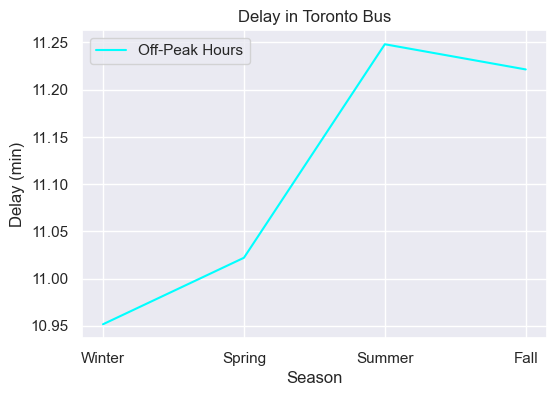

In [88]:
# Plot Toronto bus Delay by season with peak hours

sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 1]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 1]['Min Delay'], errorbar=None, label='Peak Hours', color='#FF00FF')
sns.lineplot(x=ttc_bus_df[ttc_bus_df['peakhour'] == 0]['season'], y= ttc_bus_df[ttc_bus_df['peakhour'] == 0]['Min Delay'], errorbar=None, label='Off-Peak Hours',
             color='#00FFFF')
# Set labels 
plt.xlabel('Season', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Bus")

plt.show()


### Incident


In [89]:
ttc_bus_df

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,year,month,month_day,hour,peakhour,season
Datetime,,,,,,,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0,2018,1,1,0,0,Winter
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0,2018,1,1,0,0,Winter
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0,2018,1,1,0,0,Winter
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0,2018,1,1,0,0,Winter
2018-01-01,5,2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,W/B,8453.0,2018,1,1,0,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,313455,2023-09-30,41,23:45,Saturday,KEELE STATION,Mechanical,22.0,44.0,NaN,1420.0,2023,9,30,0,0,Fall
2023-09-30,313456,2023-09-30,121,23:55,Saturday,103 LOWER JARVIS ST,Operations - Operator,20.0,40.0,E,8577.0,2023,9,30,0,0,Fall
2023-09-30,313457,2023-09-30,52,00:29,Saturday,THE WESTWAY AND KIPLIN,Emergency Services,23.0,46.0,W,3576.0,2023,9,30,0,0,Fall


C:\Users\diana\AppData\Local\Temp\ipykernel_17884\4200767851.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


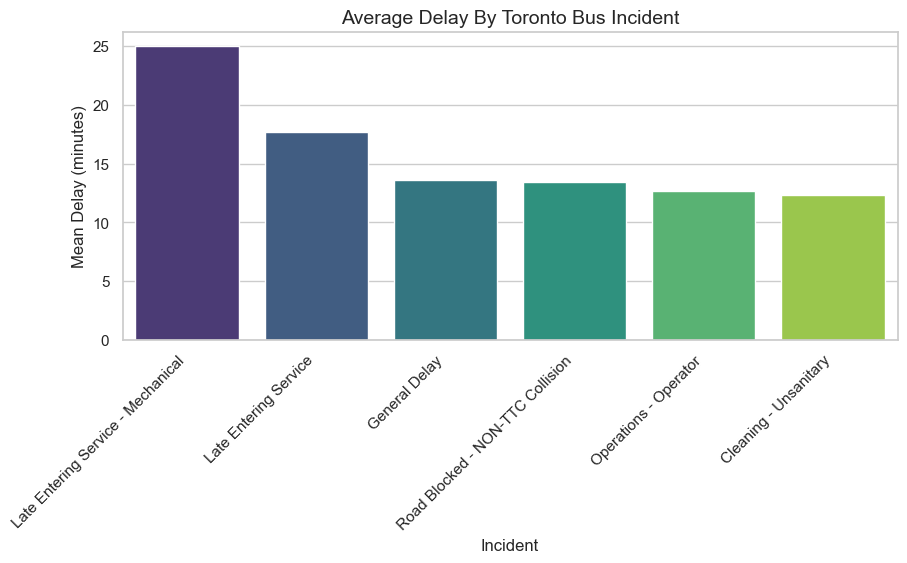

In [91]:
# Barplot of Min Delay and Incident for TTC BUSES
ttc_bus_agg_code = ttc_bus_df.groupby('Incident')['Min Delay'].mean().reset_index()

# Sort the DataFrame by 'Min Delay' values in descending order
ttc_bus_agg_sorted_code = ttc_bus_agg_code[ttc_bus_agg_code['Min Delay'] > 12].sort_values(by='Min Delay', ascending=False)

sns.set(style="whitegrid") 
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Incident', y='Min Delay', data=ttc_bus_agg_sorted_code, palette='viridis', hue = 'Incident', legend= False)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set labels and title
plt.xlabel('Incident', fontsize=12)
plt.ylabel('Mean Delay (minutes)', fontsize=12)
plt.title('Average Delay By Toronto Bus Incident', fontsize=14)

# Show the plot
plt.show()

## Mode of Transportation comparison

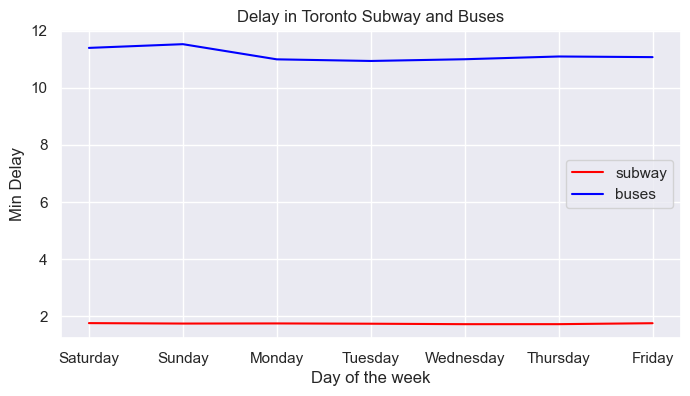

In [94]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['Day'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0
#plt.ylim(0, 3.5)
plt.show()

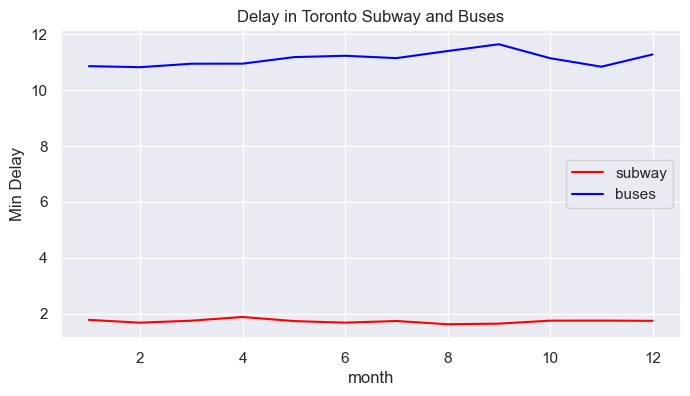

In [95]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None, color='red',label='subway')
sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'],errorbar=None, color='blue',label='buses')
# Set labels 
plt.xlabel('month', fontsize=12)
plt.title("Delay in Toronto Subway and Buses")
# Set y-axis limits to start from 0

plt.show()


## TORONTO WEATHER

In [113]:
#Import Toronto Weather dataset
toronto_weather = pd.read_csv("toronto_weather_simplified.csv")
toronto_weather.head(10)

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),...,Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01,2018,1,1,-7.8,...,NaN,0.0,NaN,0.0,NaN,NaN,25.0,NaN,52,NaN
1,1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-02,2018,1,2,-6.4,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,65,NaN
2,2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-03,2018,1,3,-4.9,...,NaN,0.0,NaN,0.0,NaN,NaN,23.0,NaN,63,NaN
3,3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-04,2018,1,4,-7.4,...,NaN,0.0,NaN,0.0,NaN,NaN,34.0,NaN,56,NaN
4,4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-05,2018,1,5,-14.8,...,NaN,0.0,NaN,0.0,NaN,NaN,30.0,NaN,48,NaN
5,5,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-06,2018,1,6,-15.4,...,NaN,0.0,NaN,0.0,NaN,NaN,28.0,NaN,35,NaN
6,6,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-07,2018,1,7,-0.5,...,NaN,0.0,NaN,0.0,NaN,NaN,22.0,NaN,63,NaN
7,7,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-08,2018,1,8,2.8,...,NaN,0.0,NaN,0.7,NaN,NaN,23.0,NaN,56,NaN
8,8,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-09,2018,1,9,1.5,...,NaN,0.0,NaN,0.0,NaN,NaN,25.0,NaN,35,NaN
9,9,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-10,2018,1,10,3.2,...,NaN,0.0,NaN,0.7,NaN,NaN,NaN,NaN,<31,NaN


In [114]:
toronto_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 18616 non-null  int64  
 1   Longitude (x)              18616 non-null  float64
 2   Latitude (y)               18616 non-null  float64
 3   Station Name               18616 non-null  object 
 4   Climate ID                 18616 non-null  int64  
 5   Date/Time                  18616 non-null  object 
 6   Year                       18616 non-null  int64  
 7   Month                      18616 non-null  int64  
 8   Day                        18616 non-null  int64  
 9   Max Temp (°C)              17548 non-null  float64
 10  Max Temp Flag              697 non-null    object 
 11  Min Temp (°C)              17550 non-null  float64
 12  Min Temp Flag              697 non-null    object 
 13  Mean Temp (°C)             17548 non-null  flo

In [105]:
#Drop undesired columns
columns_to_drop = ['Unnamed: 0','Climate ID','Max Temp Flag','Min Temp Flag','Mean Temp Flag',
                   'Heat Deg Days Flag','Cool Deg Days Flag','Total Precip Flag','Snow on Grnd (cm)']
toronto_weather = toronto_weather.drop(columns=columns_to_drop)
toronto_weather.head()

,Longitude (x),Latitude (y),Station Name,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.63,TORONTO CITY CENTRE,2018-01-01,2018,1,1,-7.8,-18.3,-13.1,31.1,0.0,0.0,25.0,NaN,52,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,2018-01-02,2018,1,2,-6.4,-11.9,-9.2,27.2,0.0,0.0,24.0,NaN,65,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,2018-01-03,2018,1,3,-4.9,-10.3,-7.6,25.6,0.0,0.0,23.0,NaN,63,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,2018-01-04,2018,1,4,-7.4,-19.4,-13.4,31.4,0.0,0.0,34.0,NaN,56,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,2018-01-05,2018,1,5,-14.8,-20.7,-17.8,35.8,0.0,0.0,30.0,NaN,48,NaN


In [115]:
toronto_weather.describe()

,Unnamed: 0,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg)
count,18616.000000,18616.0,18616.00,18616.0,18616.000000,18616.000000,18616.000000,17548.000000,17550.000000,17548.000000,17548.000000,17548.000000,17845.000000,0.0,14951.000000
mean,9307.500000,-79.4,43.63,6158359.0,2021.176407,6.525784,15.721261,12.914121,5.841208,9.394267,9.483992,0.878260,1.979367,NaN,20.404254
std,5374.120641,0.0,0.00,0.0,1.517322,3.448011,8.796785,10.053401,9.409849,9.631992,8.539684,1.785858,5.148527,NaN,10.794210
min,0.000000,-79.4,43.63,6158359.0,2018.000000,1.000000,1.000000,-15.400000,-22.000000,-18.700000,0.000000,0.000000,0.000000,NaN,1.000000
25%,4653.750000,-79.4,43.63,6158359.0,2019.000000,4.000000,8.000000,4.400000,-0.800000,1.800000,0.000000,0.000000,0.000000,NaN,7.000000
50%,9307.500000,-79.4,43.63,6158359.0,2021.000000,7.000000,16.000000,12.400000,5.500000,8.850000,9.150000,0.000000,0.000000,NaN,24.000000
75%,13961.250000,-79.4,43.63,6158359.0,2022.000000,10.000000,23.000000,22.300000,14.600000,18.425000,16.200000,0.425000,1.000000,NaN,30.000000
max,18615.000000,-79.4,43.63,6158359.0,2023.000000,12.000000,31.000000,34.900000,24.000000,29.300000,36.700000,11.300000,72.300000,NaN,36.000000


### TTC Subway,Buses and Mean temperature

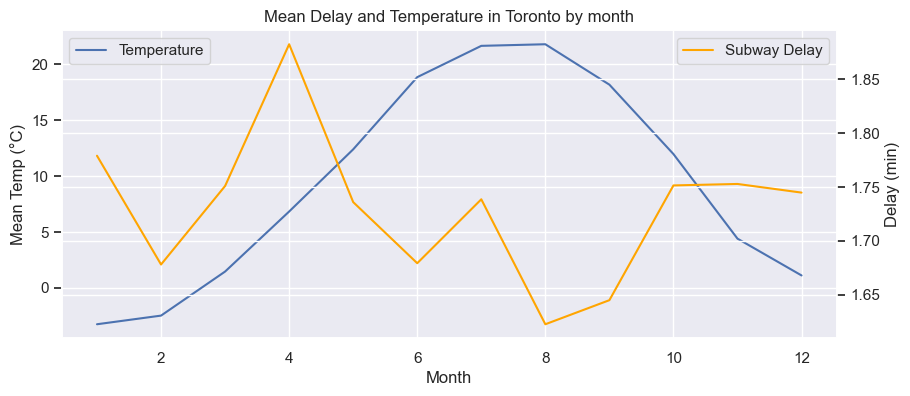

In [123]:
# Plot Toronto subway Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Mean Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'], ax=ax2, color='orange', label='Subway Delay',errorbar=None)
ax2.set_ylabel('Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

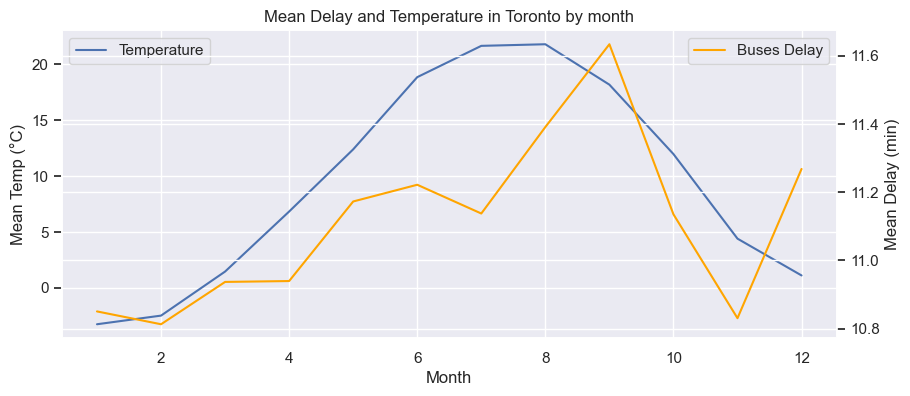

In [125]:
# Plot Toronto BUSES  Temperature by month
sns.set()
fig, ax1 = plt.subplots(figsize=(10, 4))

sns.lineplot(x=toronto_weather['Month'], y=toronto_weather['Mean Temp (°C)'], ax=ax1, label='Temperature', errorbar=None)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Mean Temp (°C)', fontsize=12)
ax1.set_title("Mean Delay and Temperature in Toronto by month")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Toronto Delay by month on the second y-axis
sns.lineplot(x=ttc_bus_df['month'], y=ttc_bus_df['Min Delay'], ax=ax2, color='orange', label='Buses Delay',errorbar=None)
ax2.set_ylabel('Mean Delay (min)', fontsize=12)

# Display legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()